<a href="https://colab.research.google.com/github/novanjanis322/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Assign data to variable df(dataframe)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

Show column and its datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


##check null data

In [ ]:
df.isna().sum()

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

##Show descriptive statistics

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##Check unique values in sex attribute

In [ ]:
unique_values = df['Sex'].unique()
print(unique_values)

['M' 'F' nan]


##Bar Chart Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

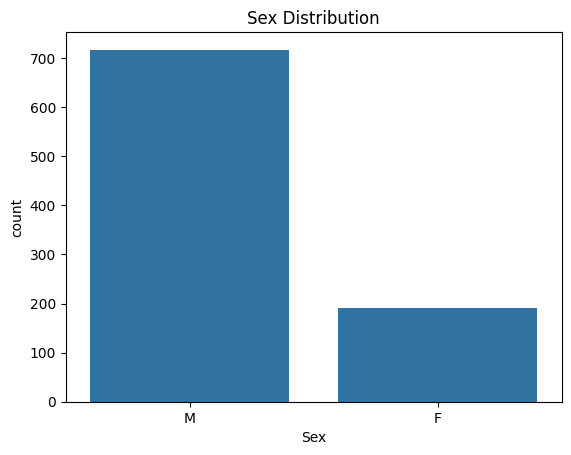

In [ ]:
import seaborn as sns
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show


##Histogram Visualization

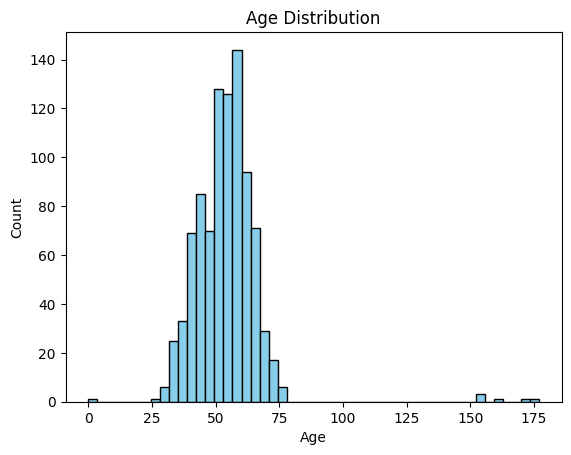

In [ ]:
from matplotlib import pyplot as plt
plt.hist(df['Age'], bins=50, color="skyblue", edgecolor = 'black')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

##Check duplicate data

In [ ]:
duplicate_rows = df[df.duplicated()]
print('Duplicate Data =', len(duplicate_rows))

Duplicate Data = 0


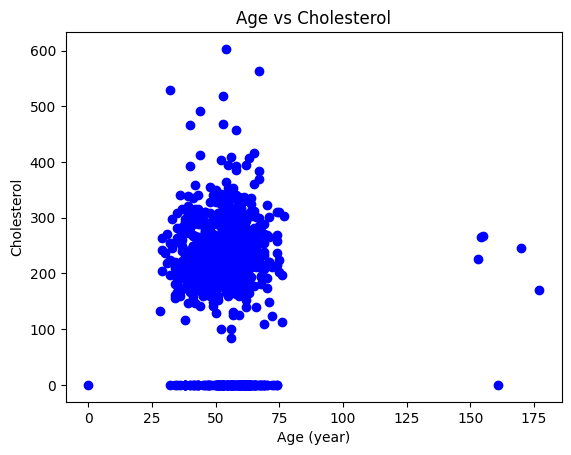

In [ ]:
import matplotlib.pyplot as plt

x = df['Age']
y = df['Cholesterol']
plt.scatter(x, y, c ="blue")
plt.title("Age vs Cholesterol")
plt.xlabel("Age (year)")
plt.ylabel("Cholesterol")

plt.show()

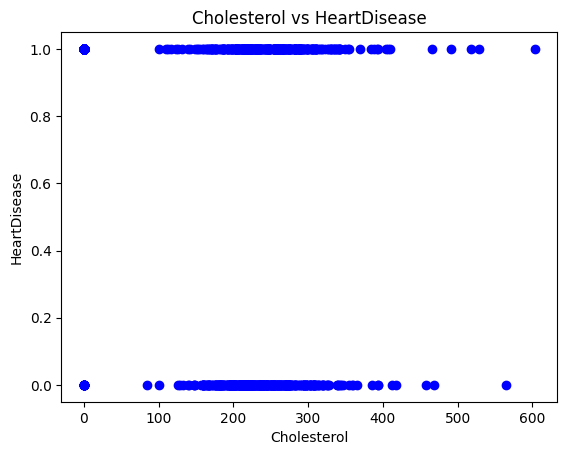

In [ ]:
import matplotlib.pyplot as plt

x = df['Cholesterol']
y = df['HeartDisease']
plt.scatter(x, y, c ="blue")
plt.title("Cholesterol vs HeartDisease")
plt.xlabel("Cholesterol")
plt.ylabel("HeartDisease")

plt.show()

<Axes: >

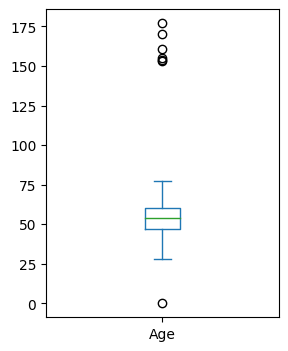

In [ ]:
df['Age'].plot(kind='box', figsize=(3,4))

<Axes: >

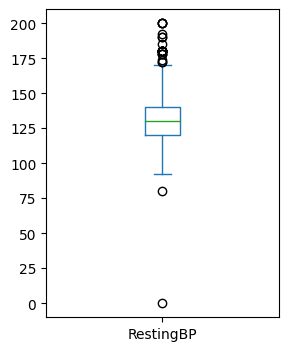

In [ ]:
df['RestingBP'].plot(kind='box', figsize=(3,4))

<Axes: >

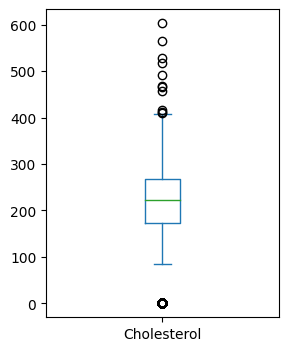

In [ ]:
df['Cholesterol'].plot(kind='box', figsize=(3,4))

In [ ]:
# Menampilkan variabel dan ukuran data
def display_df(df):
      display(df.head())
      print(df.shape)

In [ ]:
df.isna().sum()

df.dropna(subset=['Sex'], inplace=True)
display_df(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


(908, 12)


Merubah data nonnumerik jadi numerik

<function matplotlib.pyplot.show(close=None, block=None)>

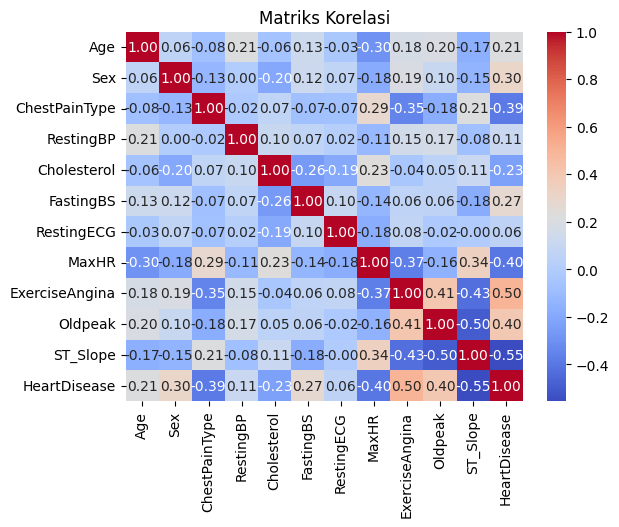

In [ ]:
# Melakukan transformasi data string menjadi interger
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

# Menghitung Matriks Korelasi
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,
	cmap='coolwarm',fmt=".2f")
plt.title('Matriks Korelasi')
plt.show

In [ ]:
display_df(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,1,1,140,289,0,1,172,0,0.0,2,0
1,49.0,0,2,160,180,0,1,156,0,1.0,1,1
2,37.0,1,1,130,283,0,2,98,0,0.0,2,0
3,48.0,0,0,138,214,0,1,108,1,1.5,1,1
4,54.0,1,2,150,195,0,1,122,0,0.0,2,0


(908, 12)


PEMBERSIHAN DATA NUMERIK

In [ ]:
# MENGGANTI data null pada variabel  Age dengan nilai rata-rata variabel tersebut
rata_rata = df['Age'].mean()
df['Age'].fillna(rata_rata, inplace=True)

# MENGHAPUS data null pada variabel  Sex
df.dropna(subset=['Sex'], inplace=True)
display_df(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.114191,1,1,140,289,0,1,172,0,0.0,2,0
1,49.000000,0,2,160,180,0,1,156,0,1.0,1,1
2,37.000000,1,1,130,283,0,2,98,0,0.0,2,0
3,48.000000,0,0,138,214,0,1,108,1,1.5,1,1
4,54.000000,1,2,150,195,0,1,122,0,0.0,2,0


(908, 12)


PEMBERSIHAN DATA PENCILAN/OUTLIER

<Axes: >

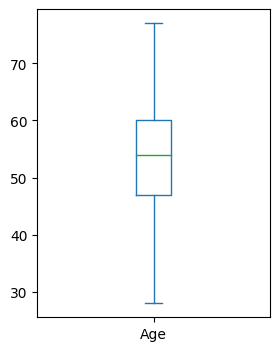

In [ ]:
# Menghitung IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk data pencilan
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi data pencilan
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Menghapus data pencilan
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
df = df_no_outliers

df["Age"].plot(kind='box', figsize=(3,4))

<Axes: >

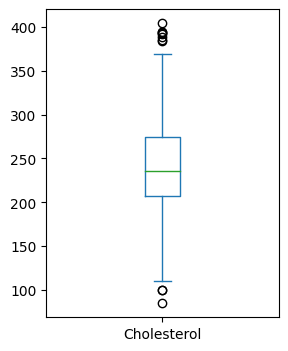

In [ ]:
# Menghitung IQR
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk data pencilan
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi data pencilan
outliers = df[(df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound)]

# Menghapus data pencilan
df_no_outliers = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]
df = df_no_outliers

df["Cholesterol"].plot(kind='box', figsize=(3,4))

KONSTRUKSI DATA STANDARDISASI DATA

In [ ]:
from sklearn import preprocessing

x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']



PEMODELAN DATA

In [ ]:
# Mengimpor library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Membagi variabel data menjadi variabel dependent dan independent (target)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Membagi data input menjadi data training dan data testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

TRAINING MODEL

In [ ]:
# Gini Index digunakan sebagai Splitting Criterion
modelDT_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)

modelDT_gini.fit(X_train, y_train)
y_pred = modelDT_gini.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix: \n ", classification_report(y_test, y_pred))

Accuracy :  85.51724137931035
Confusion Matrix: 
                precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.87      0.81      0.84        68

    accuracy                           0.86       145
   macro avg       0.86      0.85      0.85       145
weighted avg       0.86      0.86      0.85       145



entropy sebagai criteria training

In [ ]:
# Entropy digunakan sebagai Splitting Criterion
modelDT_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, 	min_samples_leaf=5)

modelDT_entropy.fit(X_train, y_train)
y_pred = modelDT_entropy.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix: \n ", classification_report(y_test, y_pred))

Accuracy :  85.51724137931035
Confusion Matrix: 
                precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.87      0.81      0.84        68

    accuracy                           0.86       145
   macro avg       0.86      0.85      0.85       145
weighted avg       0.86      0.86      0.85       145



VISUALISASI MODEL

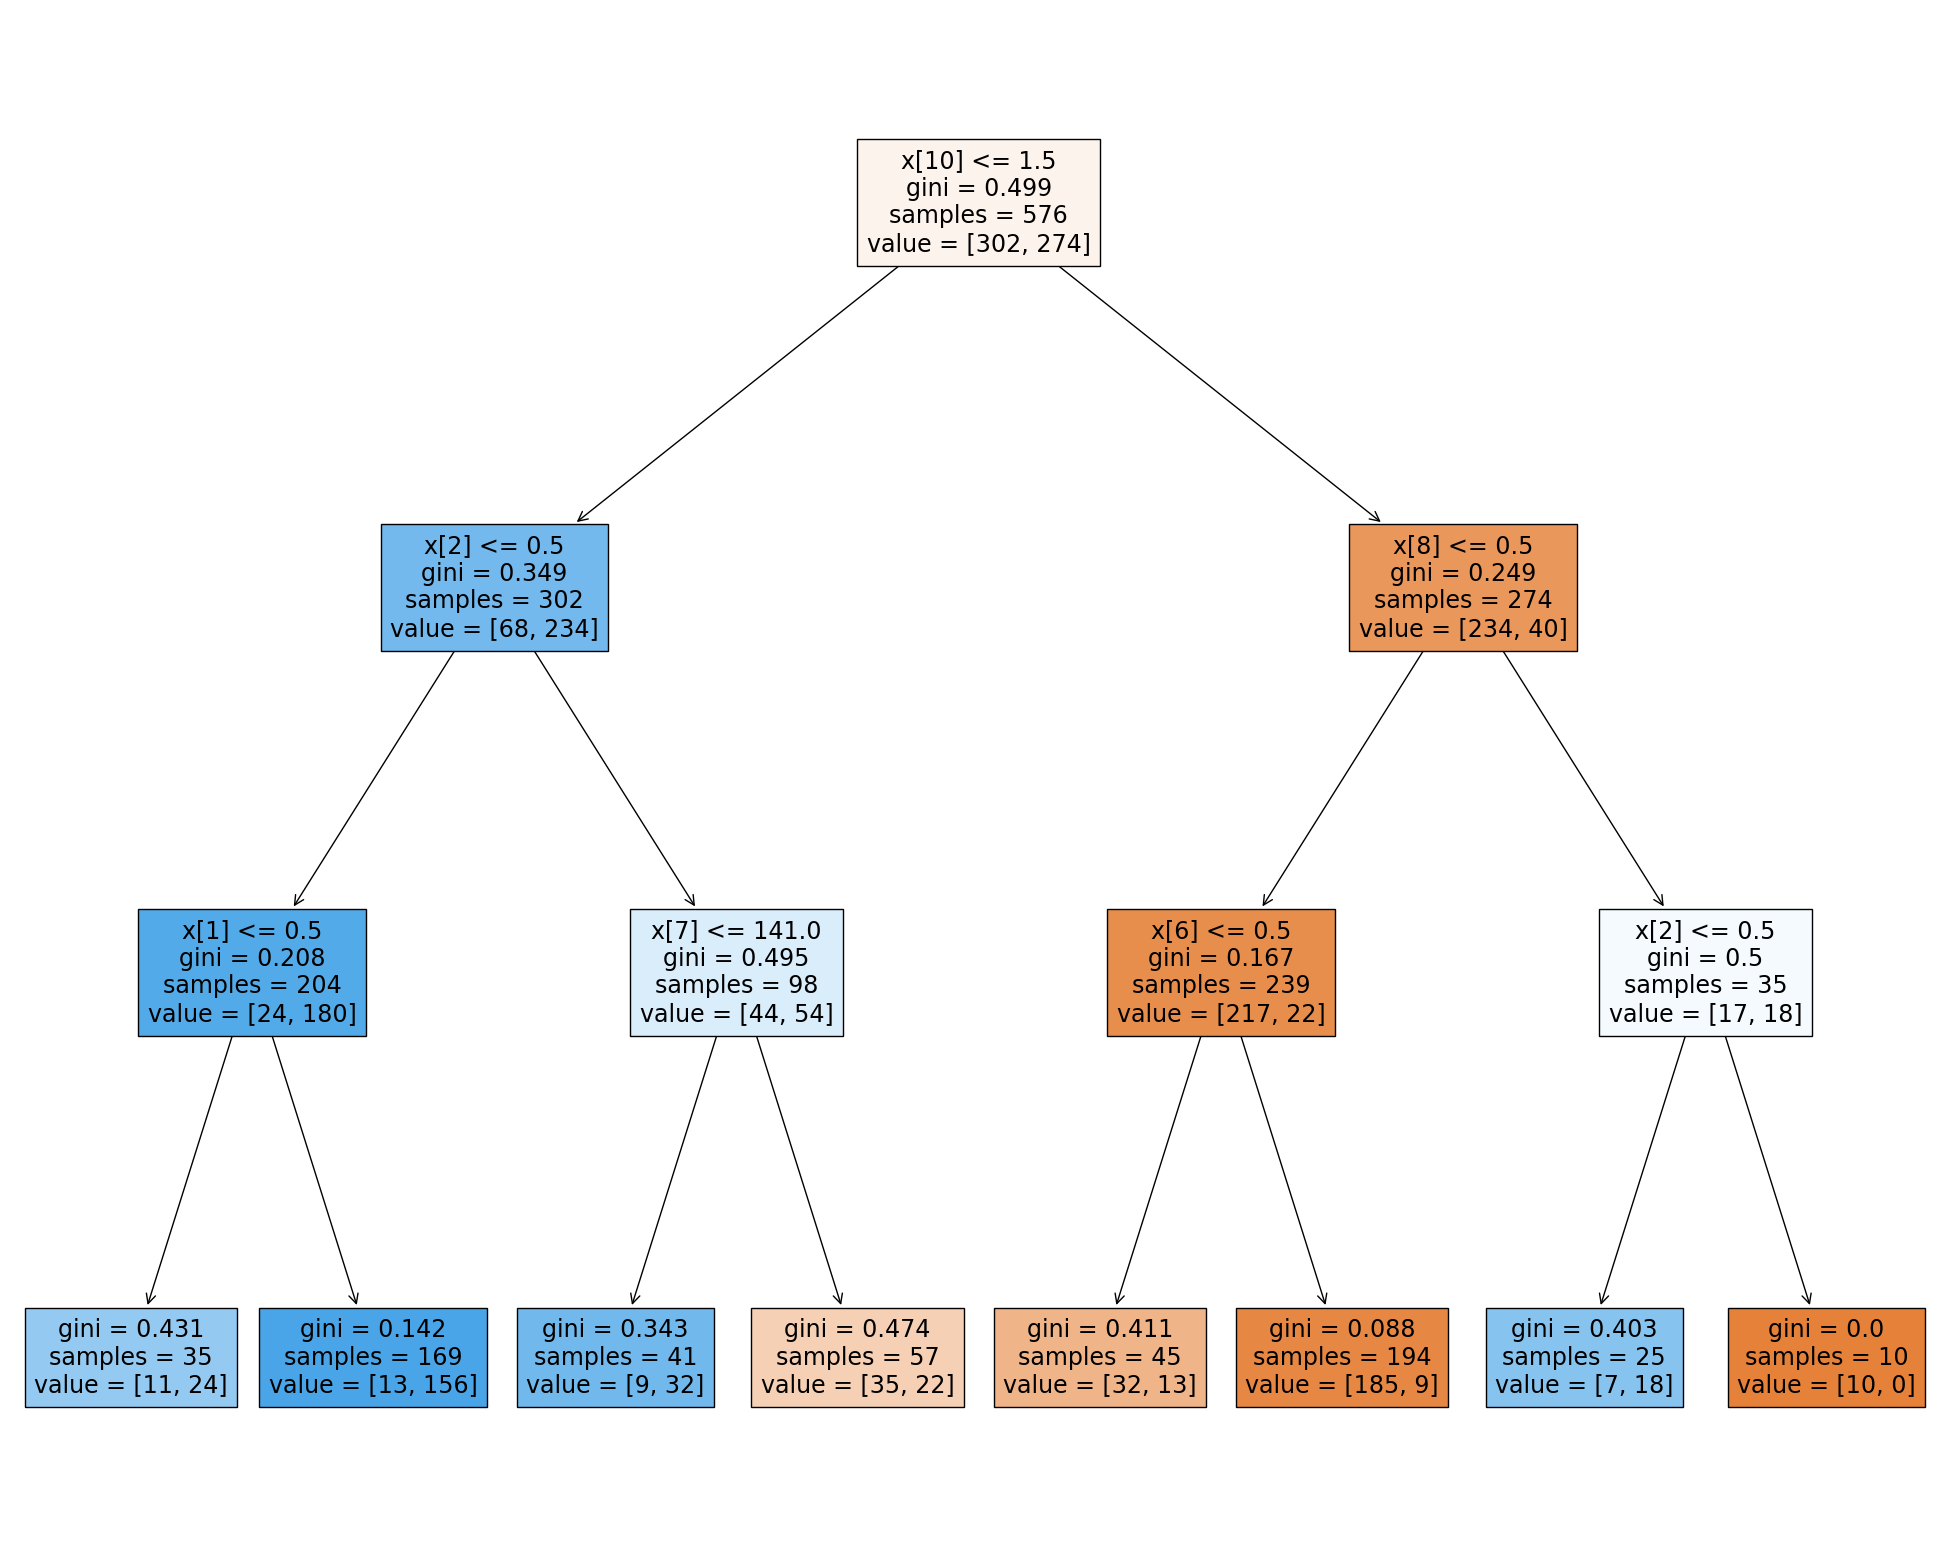

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree


fig = plt.figure(figsize=(25, 20))
_ = plot_tree(modelDT_gini,
              # feature_names=iris.feature_names,
              # class_names=HeartDisease,
              filled=True)

plt.show()

TRAINING MODEL SVM


In [ ]:
from sklearn.svm import SVC
SVMmodel = SVC (C=1, kernel='rbf').fit(X_train, y_train)
y_pred = SVMmodel.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix: \n ", classification_report(y_test, y_pred))

Accuracy :  69.6551724137931
Confusion Matrix: 
                precision    recall  f1-score   support

           0       0.73      0.68      0.70        77
           1       0.66      0.72      0.69        68

    accuracy                           0.70       145
   macro avg       0.70      0.70      0.70       145
weighted avg       0.70      0.70      0.70       145

